---
authors: Freek Pols
updated: December 3, 2025
---

# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


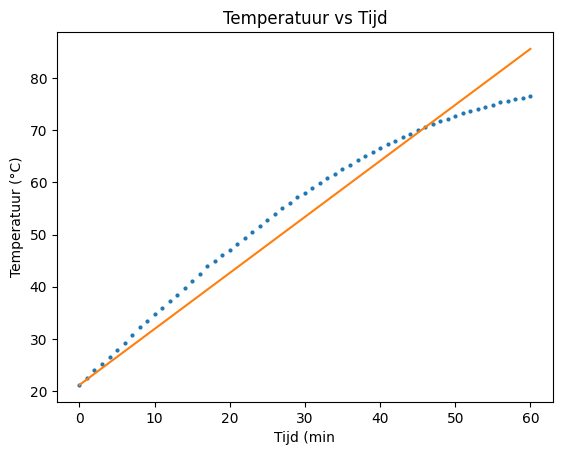

Totaal toegevoegde energie is:  124685.66239878746 +/- 1681.0374404748084 Joule
Energie van de opwarming en verdamping is:  107343.61616 Joule


In [26]:
data = np.loadtxt(r"C:\Users\simon\Downloads\TU Delft\Bsc1 TN\Q2\IP2\Labs\tempmetingen-46931600a9ec9432720d281e3972dd50.csv", skiprows=1, delimiter=';')
time = data[:,0]
Temp = data[:,1]
T_0 = Temp[0]
c_w = 4184  # J/kgK
m_wb = (1292.9-820.8)/1000 # kg
m_we = (1274.9-820.8)/1000 # kg


def T(t, P):
    return T_0 + (P / ((m_wb+m_we)/2 * c_w)) * t

values, covariance = curve_fit(T, time, Temp, p0 =2500)
P = values[0]
P_unc = np.sqrt(covariance[0][0])

plt.plot(time, Temp, 'o', markersize = 2)
plt.plot(time, T(time, P), '-', label=f'Fit: P={P:.2f} W')
plt.xlabel('Tijd (min')
plt.ylabel('Temperatuur (°C)')
plt.title('Temperatuur vs Tijd')
plt.show()

print("Totaal toegevoegde energie is: ", P * (time[-1] - time[0]), "+/-", P_unc * (time[-1] - time[0]), "Joule")
print("Energie van de opwarming en verdamping is: ", c_w * (m_we+m_wb)/2 * (Temp[-1] - Temp[0]), "Joule") #Hier is de aanname dat de massa lineair afneemt

De energie van de opwarming van het water is ietsjes lager dan de totaal toegevoegde energie doordat er energie in de opwarming van de maatbeker gaat zitten; hier is geen rekening mee gehouden in het berekenen van de energie van de opwarming van het water. 

Voor toekomstige experimenten kan rekening worden gehouden met warmte die in de maatbeker zit, hier is nu geen rekening mee gehouden bij het bepalen van het vermogen en bij het berekenen van de energie van opwarming en verdamping. Ook kan in verdere experimenten het vermogen van het verwarmingsexperiment direct worden afgelezen, dit is accurater dan het vermogen uit een curve fit te halen. Als laatste zou er nog kunnen worden gekeken naar de afname van de massa en of deze daadwerkelijk lineair is 